In [8]:
#import os
#os.chdir("/work/aa0238/a271093/Scripts/MOAAP")
#!pwd

/work/aa0238/a271093/Scripts/MOAAP


In [10]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import datetime
import cartopy
from metpy.units import units
import cartopy.crs as ccrs
import pickle
import os

from src.utils import * 
from src.Corrections import * 
from src.Enumerations import Month, Season, Experiments, Domains
from src.xarray_util import create_obj_from_dict,  ObjectContainer,  load_tracking_objects
from src.plot_funcs import plot_on_rotated_grid, plot_contourf_rotated_grid


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/work/aa0238/a271093/Scripts/MOAAP/src/xarray_util.py:27: AccessorRegistrationWarning: registration of accessor <class 'src.xarray_util.Accessor'> under name 'get' for type <class 'xarray.core.dataset.Dataset'> is overriding a preexisting attribute with the same name.
  class Accessor:


## Settings

In [ ]:
exp_ICON_ERA5=Experiments.ICON_ERA5.value
exp_ERA5=Experiments.ERA5.value

input_path_ICON_ERA5= exp_ICON_ERA5.path_IVT_tracking
input_path_ERA5= exp_ERA5.path_IVT_tracking


type_='IVT'
input_file_name_temp_ERA5 = 'MOAPP_ERA5_100and85controlperc_remapped_3x'
input_file_name_temp_ICON_ERA5 = 'MOAPP_ICON_ERA5_100and85ERA5perc_remapped_3x'

first_year = 1979
last_year = 2022
num_years = last_year-first_year

## Load pickle dictionaries into in-memory Datasets

In [ ]:
IVT_objs_ERA5 = load_tracking_objects(input_path_ERA5,
                                      input_file_name_temp_ERA5,
                                      type_,
                                      first_year,
                                      last_year,
                                      load_coordinates=True,
                                      compute_hist = False,
                                      #compute_hist = False,
                                      exp=exp_ERA5,
                                      var_names_ls = ["IVT","IWV"],
                                      var_paths_ls = ["/work/aa0238/a271093/data/ERA5/1979-2023/ICON_remapped_3x/IVT/",#,
                                                      "/work/aa0238/a271093/data/ERA5/1979-2023/ICON_remapped_3x/IWV/"]
                                      
                                      )

Season.DJF
Season.MAM
Season.JJA
Season.SON


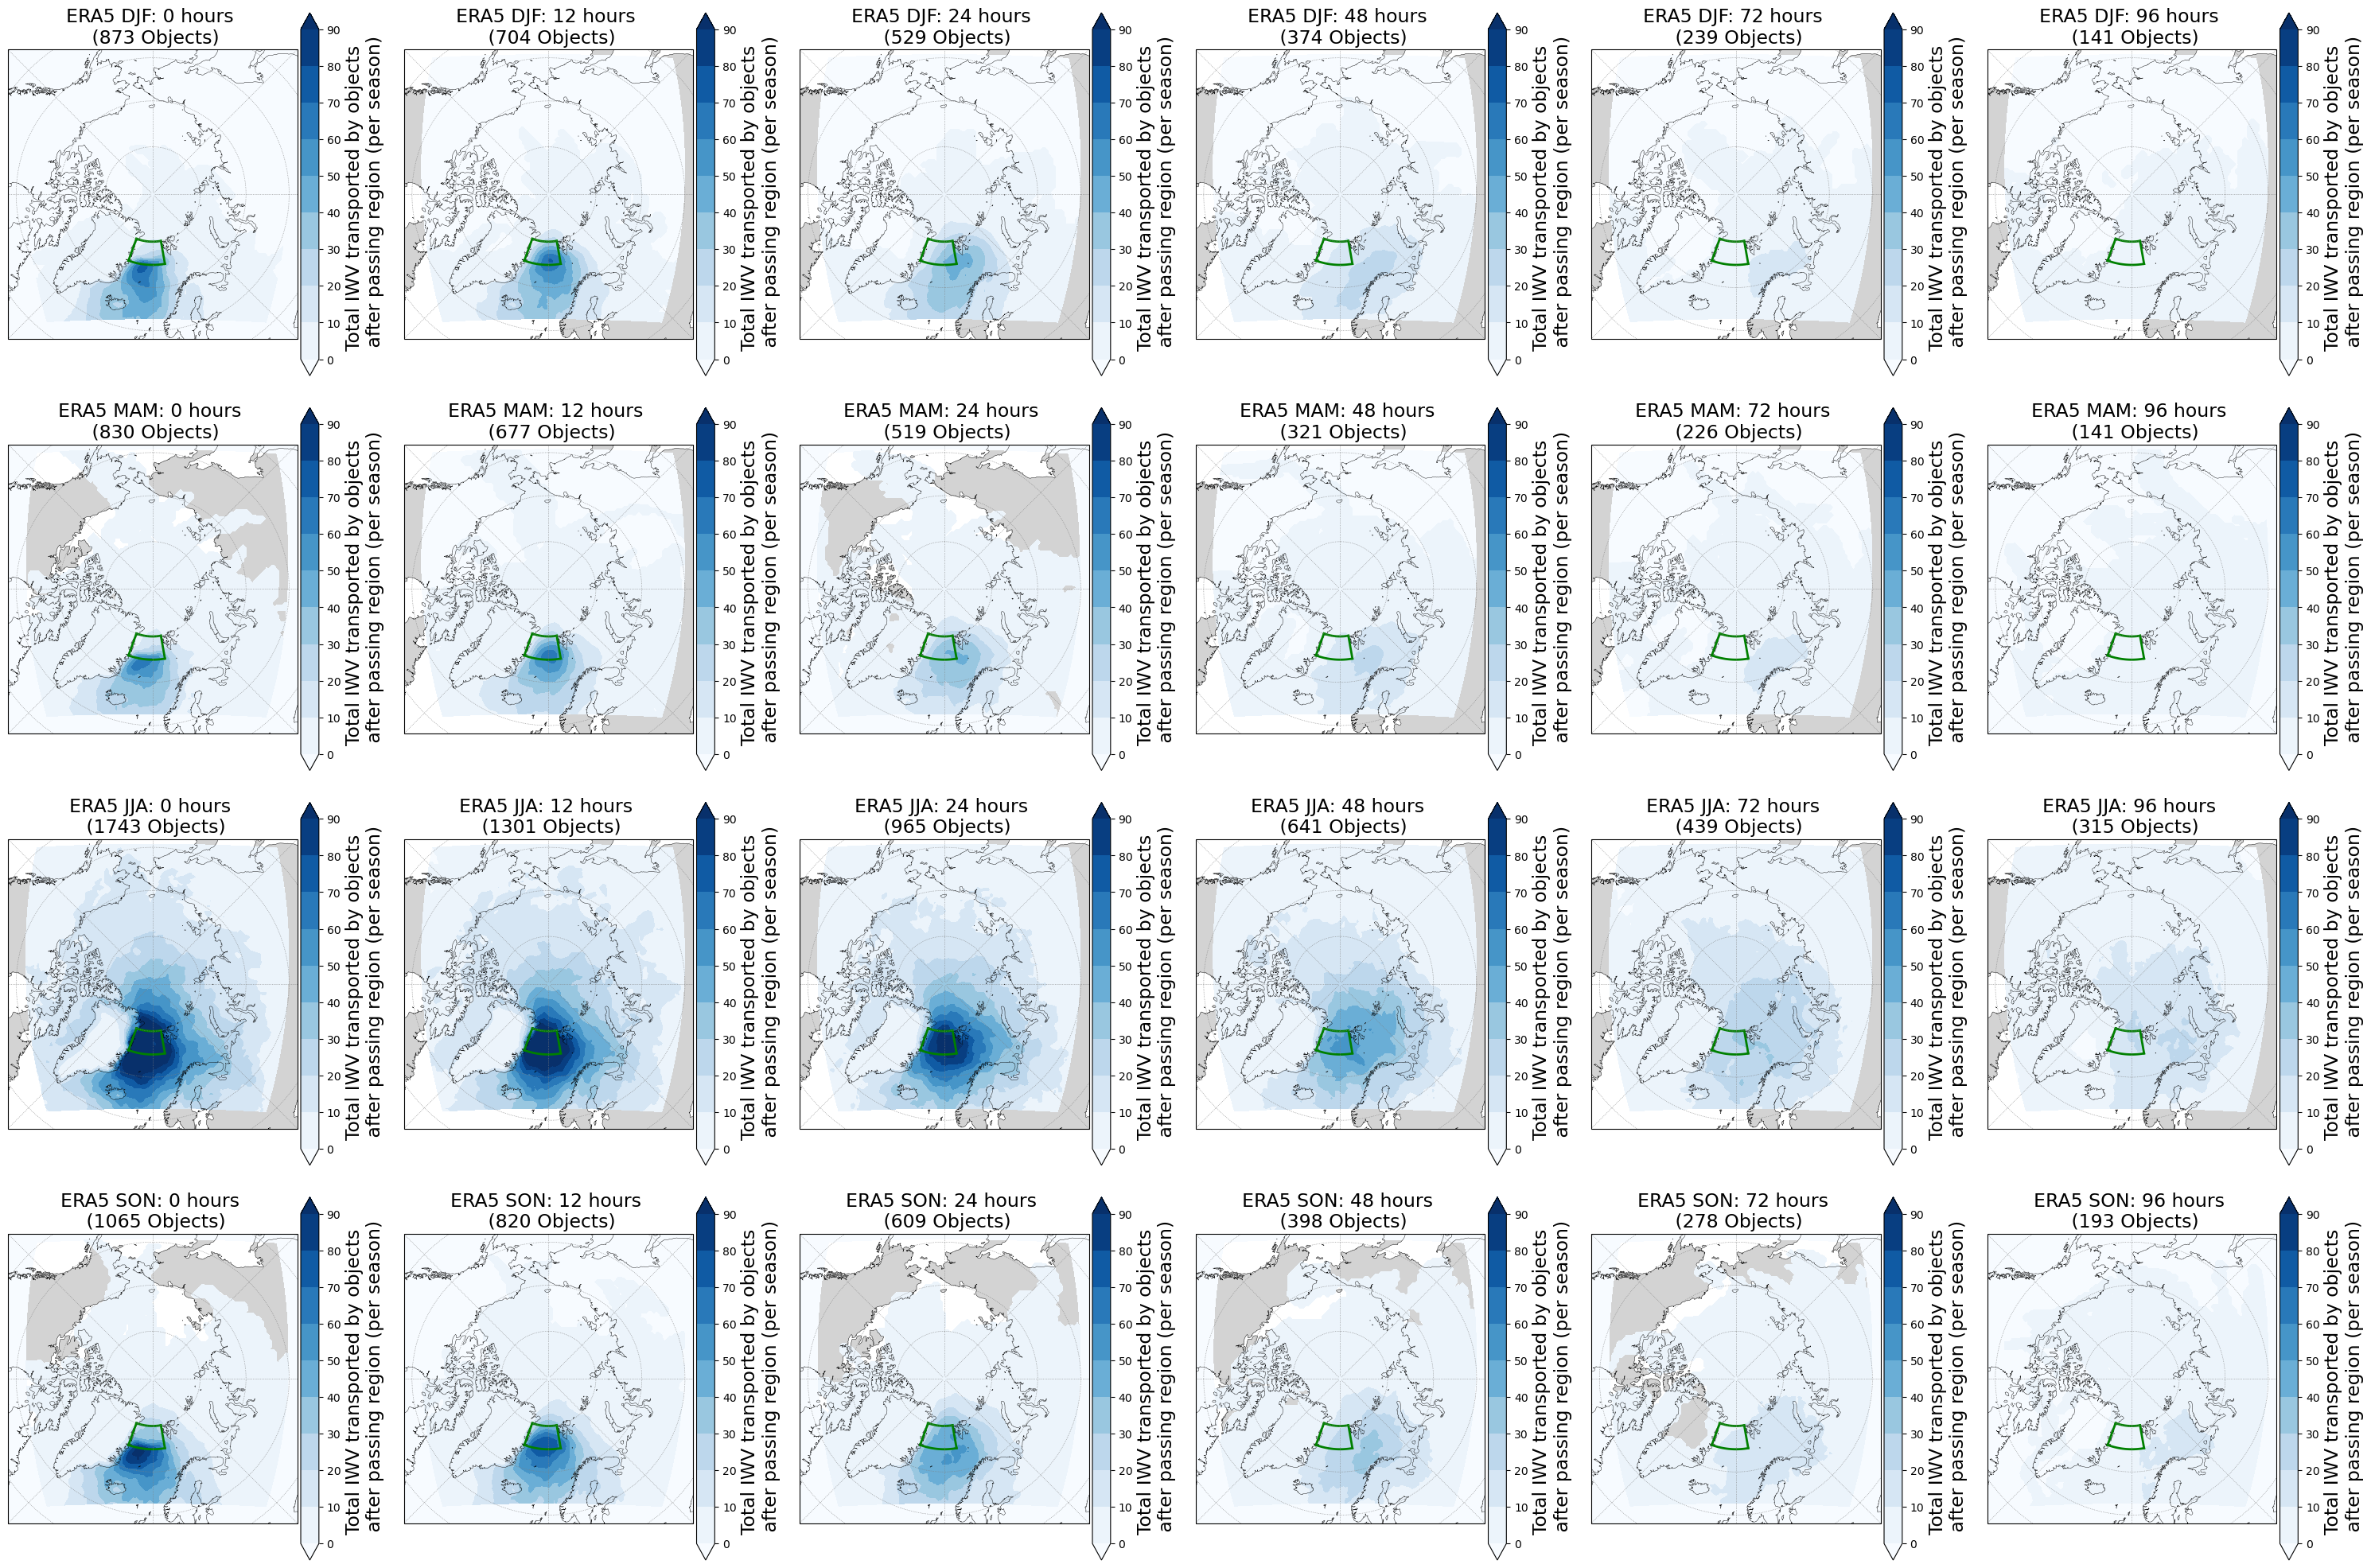

In [12]:
fig = plt.figure(figsize=(30,20))
levels=np.arange(0,100,10)
tsteps=[0,12,24,48,72,96]
subplts = (4,len(tsteps))
plot_idx = np.arange(0,len(tsteps)*4,len(tsteps))
font_size = 17

for  season_,i in zip(Season,plot_idx):
    k=0

    print (season_)
    
        
    
        
    IVTobjs_sel_ERA5 = IVT_objs_ERA5.sel_season(season_).sel_by_domain(Domains.GREENLAND_SEA,type_="anytime", domain_frac = 0.1, select_last_timesteps=True)
    for j,t in enumerate(tsteps):

        IVTobjs_sel_tstep = IVTobjs_sel_ERA5.seltimesteps(time_slice=slice(t,t+1))
        number_objs =IVTobjs_sel_tstep.count()


        lon,lat,z = calculate_variable_sum(IVTobjs_sel_tstep, attr="IWV")
    
        # normalize grid point counts to counts per season
        z= (z/num_years)*1.000001
    
        plot_on_rotated_grid(lon,
                                  lat, 
                                  z, 
                                  fig=fig,
                                  index = i+j ,
                                  levels = levels,
                                   subplts=subplts,
                                  title=f'ERA5 {season_.name}: {tsteps[k]} hours \n ({number_objs} Objects)',
                                  cbar_label = "Total IWV transported by objects \n after passing region (per season)",
                                  plot_domains={Domains.GREENLAND_SEA : 'green'},
                                  cbar=True,
                                  font_size=font_size
                                    )

        k +=1
        
   
    
plt.tight_layout()

In [9]:
fig = plt.figure(figsize=(30,20))
levels=np.arange(0,20,2)
tsteps=[0,12,24,48,72,96]
subplts = (4,len(tsteps))
plot_idx = np.arange(0,len(tsteps)*4,len(tsteps))
font_size = 17

for  season_,i in zip(Season,plot_idx):
    k=0

    print (season_)
    
        
    
        
    IVTobjs_sel_ERA5 = IVT_objs_ERA5.sel_season(season_).sel_by_domain(Domains.GREENLAND_SEA,type_="anytime", domain_frac = 0.1, select_last_timesteps=True).sel_by_domain(Domains.CENTRAL_ARCTIC,type_="end")
    for j,t in enumerate(tsteps):

        IVTobjs_sel_tstep = IVTobjs_sel_ERA5.seltimesteps(time_slice=slice(t,t+1))
        number_objs =IVTobjs_sel_tstep.count()


        lon,lat,z = calculate_variable_sum(IVTobjs_sel_tstep, attr="IWV")
    
        # normalize grid point counts to counts per season
        z= (z/num_years)*1.000001
    
        plot_on_rotated_grid(lon,
                                  lat, 
                                  z, 
                                  fig=fig,
                                  index = i+j ,
                                  levels = levels,
                                   subplts=subplts,
                                  title=f'ERA5 {season_.name}: {tsteps[k]} hours \n ({number_objs} Objects)',
                                  cbar_label = "Total IWV transported by objects \n after passing region (per season)",
                                  plot_domains={Domains.GREENLAND_SEA : 'green',
                                                Domains.CENTRAL_ARCTIC : 'red'},
                                                
                                  cbar=True,
                                  font_size=font_size
                                    )

        k +=1
        
   
    
plt.tight_layout()

Season.DJF


NameError: name 'IVT_objs_ERA5' is not defined

<Figure size 3000x2000 with 0 Axes>

In [15]:
fig = plt.figure(figsize=(30,20))
levels=np.arange(0,50,5)
tsteps=[0,12,24,48,72,96]
subplts = (4,len(tsteps))
plot_idx = np.arange(0,len(tsteps)*4,len(tsteps))
font_size = 17

for  season_,i in zip(Season,plot_idx):
    k=0

    print (season_)
    
        
    
        
    IVTobjs_sel_ERA5 = IVT_objs_ERA5.sel_season(season_).sel_by_domain(Domains.GREENLAND_SEA,type_="anytime", domain_frac = 0.1, select_last_timesteps=True)
    for j,t in enumerate(tsteps):

        IVTobjs_sel_tstep = IVTobjs_sel_ERA5.seltimesteps(time_slice=slice(t,t+1))
        number_objs =IVTobjs_sel_tstep.count()


        lon,lat,z = calculate_variable_sum(IVTobjs_sel_tstep, attr="IWV")
    
        # normalize grid point counts to counts per season
        z= (z/num_years)*1.000001
    
        plot_on_rotated_grid(lon,
                                  lat, 
                                  z, 
                                  fig=fig,
                                  index = i+j ,
                                  levels = levels,
                                   subplts=subplts,
                                  title=f'ERA5 {season_.name}: {tsteps[k]} hours \n ({number_objs} Objects)',
                                  cbar_label = "Total IWV transported by objects \n after passing region (per season)",
                                  plot_domains={Domains.GREENLAND_SEA : 'green',
                                  cbar=True,
                                  font_size=font_size
                                    )

        k +=1
        
   
    
plt.tight_layout()

Season.DJF


KeyboardInterrupt: 

<Figure size 3000x2000 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(30,20))
levels=np.arange(100,2000,100)
tsteps=[0,12,24,48,72,96]
subplts = (4,len(tsteps))
plot_idx = np.arange(0,len(tsteps)*4,len(tsteps))
font_size = 27

for  season_,i in zip(Season,plot_idx):
    k=0

    print (season_)
    
        
    
        
    IVTobjs_sel_ERA5 = IVT_objs_ERA5.sel_season(season_).sel_by_domain(Domains.GREENLAND_SEA,type_="anytime", domain_frac = 0.1, select_last_timesteps=True)
    for j,t in enumerate(tsteps):

        IVTobjs_sel_tstep = IVTobjs_sel_ERA5.seltimesteps(time_slice=slice(t,t+1))
        number_objs =IVTobjs_sel_tstep.count()


        lon,lat,z = calculate_variable_sum(IVTobjs_sel_tstep, attr="IVT")
    
        # normalize grid point counts to counts per season
        z= (z/num_years)*1.000001
    
        plot_on_rotated_grid(lon,
                                  lat, 
                                  z, 
                                  fig=fig,
                                  index = i+j ,
                                  levels = levels,
                                   subplts=subplts,
                                  title=f'ERA5 {season_.name}: {tsteps[k]} hours \n ({number_objs} Objects)',
                                  cbar_label = "Total IVT transported by objects \n after passing region (per season)",
                                  plot_domains={Domains.GREENLAND_SEA : 'green'},
                                  cbar=True,
                                  font_size=font_size
                                    )

        k +=1
        
   
    
plt.tight_layout()

In [25]:
type(Domains.GREENLAND_SEA.value)

src.GridPoints.Domain

In [1]:
from src.Enumerations import Domains
isinstance(Domains.GREENLAND_SEA, Domains)

/work/aa0238/a271093/Conda/MOAAP_env/lib/python3.12/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


True

In [2]:
type(Domains.GREENLAND_SEA)

<enum 'Domains'>

In [4]:
type(Domains)

enum.EnumType

In [7]:
print (f" type {type(Domains.__members__.__class__)}")

 type <class 'type'>


In [8]:
from typing import Type
Type[Domains]

typing.Type[src.Enumerations.Domains]